In [115]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [116]:
df_train = pd.read_csv('bigmart_train.csv')

In [117]:
df_train.shape

(8523, 12)

In [118]:
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [119]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

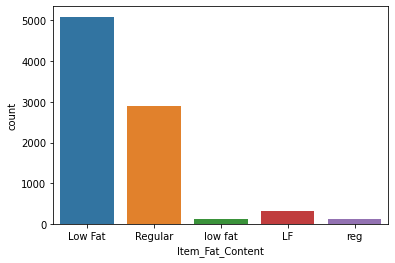

In [120]:
sns.countplot(x='Item_Fat_Content',data=df_train)

In [121]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [122]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [123]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

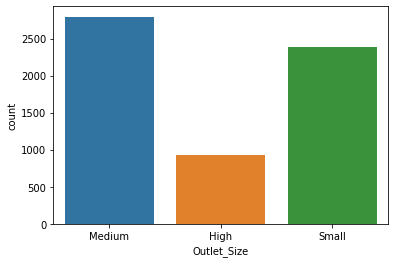

In [124]:
sns.countplot(x='Outlet_Size',data=df_train)

In [125]:
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

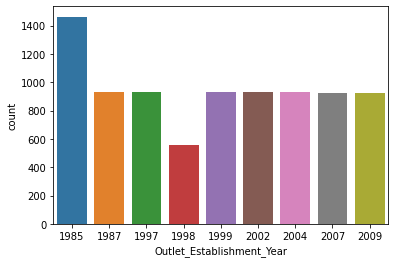

In [126]:
sns.countplot(x='Outlet_Establishment_Year',data=df_train)

In [127]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

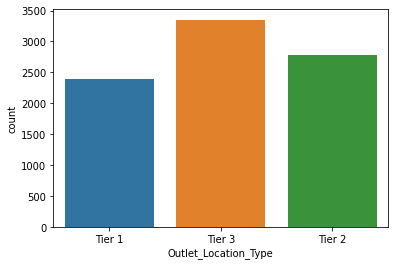

In [128]:
sns.countplot(x='Outlet_Location_Type',data=df_train)

In [129]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

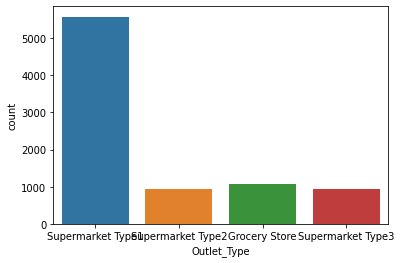

In [130]:
sns.countplot(x='Outlet_Type',data=df_train)

In [131]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [132]:
df_train['Outlet_Age']=2021-df_train['Outlet_Establishment_Year']

### Missing Values:

In [133]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

In [134]:
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [135]:
# df_train['Outlet_Size'].mode()[0]
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [136]:
df_train['Outlet_Size'].fillna('Medium',inplace=True)

In [137]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

### Outilers:

<AxesSubplot:>

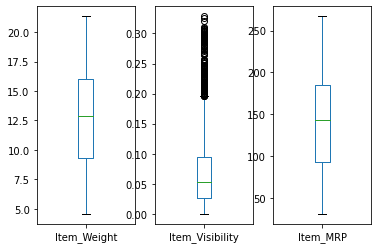

In [138]:
a,b = plt.subplots(1,3)
df_train['Item_Weight'].plot(kind='box',ax=b[0])
df_train['Item_Visibility'].plot(kind='box',ax=b[1])
df_train['Item_MRP'].plot(kind='box',ax=b[2])

<AxesSubplot:>

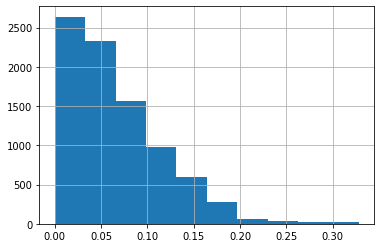

In [139]:

df_train['Item_Visibility'].hist()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

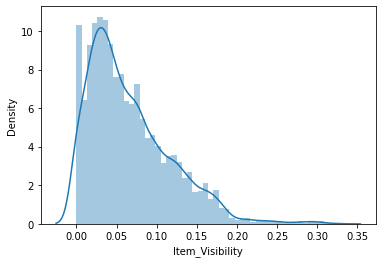

In [140]:
sns.distplot(df_train['Item_Visibility'])

<img src=IQR_Outliers.png>

In [26]:
Q1 = df_train['Item_Visibility'].quantile(.25)

Q3 = df_train['Item_Visibility'].quantile(.75)

IQR = Q3 -Q1

df2= df_train.query('(@Q1- 1.5* @IQR) <= Item_Visibility <= (@Q3 +1.5* @IQR)')

In [27]:
df2.shape

(8379, 13)

In [28]:
Q1-1.5*IQR, Q1, IQR, Q3,   Q3+1.5*IQR

(-0.07440424500000001, 0.0269894775, 0.067595815, 0.0945852925, 0.195979015)

In [29]:
df2['Item_Visibility'].describe()

count    8379.000000
mean        0.063061
std         0.046130
min         0.000000
25%         0.026789
50%         0.052729
75%         0.092277
max         0.195721
Name: Item_Visibility, dtype: float64

***

In [89]:
df_train=df2

In [90]:
df_train.shape

(8379, 14)

In [91]:
df_train['Item_Fat_Content'].unique()

array([0, 2, 1])

In [92]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [93]:
df_train['Item_Fat_Content'].unique()

array([0, 2, 1])

In [94]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].replace('reg','Regular')

In [95]:
df_train['Item_Fat_Content'].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

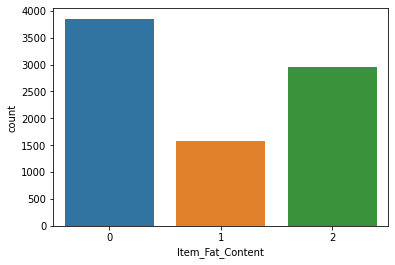

In [96]:
sns.countplot(x='Item_Fat_Content',data=df_train)

In [97]:
df_train['Item_Visibility'].value_counts().count()

4

<AxesSubplot:>

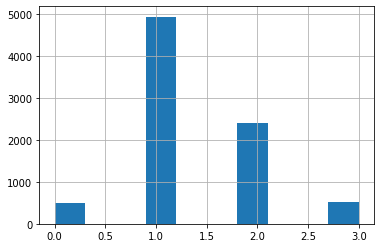

In [98]:

df_train['Item_Visibility'].hist()

### converting into Categorical values:

In [99]:
df_train['Item_Visibility']=pd.cut(df_train['Item_Visibility'],[0,0.075,0.15,0.2],labels=['Low Viz','Viz', 'High Viz'])


In [100]:
df_train['Item_Visibility'].value_counts()

Low Viz     0
Viz         0
High Viz    0
Name: Item_Visibility, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

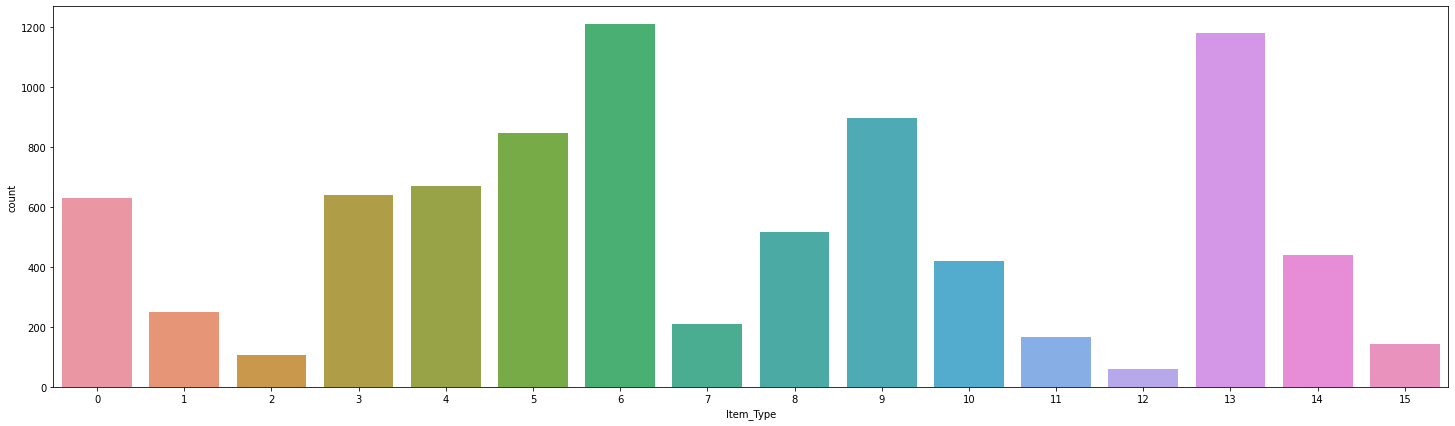

In [101]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=df_train)

In [102]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Combined
0,FDA15,9.30,0,NaN,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380,22,Food
1,DRC01,5.92,2,NaN,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228,12,Drink
2,FDN15,17.50,0,NaN,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700,22,Food
3,FDX07,19.20,2,NaN,6,182.0950,0,1998,1,2,Grocery Store,732.3800,23,Food
4,NCD19,8.93,1,NaN,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052,34,Non-Consumable


****
### create new broad category for Item Type:

In [103]:
df_train['Item_Identifier'].apply(lambda x:x[0:2])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8379, dtype: object

In [104]:
df_train['Item_Type_Combined']=df_train['Item_Identifier'].apply(lambda x:x[0:2])

In [105]:
df_train['Item_Type_Combined']=df_train['Item_Type_Combined'].map({'FD':'Food', 'DR': 'Drink', 'NC':'Non-Consumable'})

In [106]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Combined
0,FDA15,9.30,0,NaN,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380,22,Food
1,DRC01,5.92,2,NaN,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228,12,Drink
2,FDN15,17.50,0,NaN,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700,22,Food
3,FDX07,19.20,2,NaN,6,182.0950,0,1998,1,2,Grocery Store,732.3800,23,Food
4,NCD19,8.93,1,NaN,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052,34,Non-Consumable


### Modify Item_Fat_Content	:

In [107]:
df_train.loc[df_train['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [108]:
df_train['Item_Fat_Content'].value_counts()

0             3852
2             2947
Non-Edible    1580
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

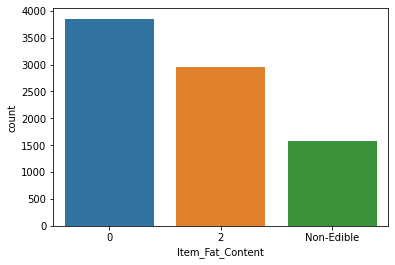

In [109]:
sns.countplot(x='Item_Fat_Content',data=df_train)

<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

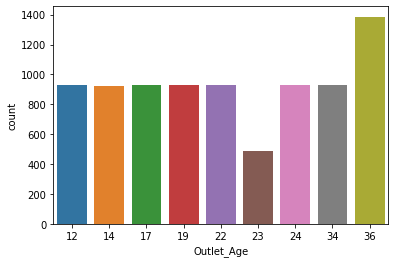

In [110]:
sns.countplot(x='Outlet_Age',data=df_train)

<AxesSubplot:xlabel='Item_Type_Combined', ylabel='count'>

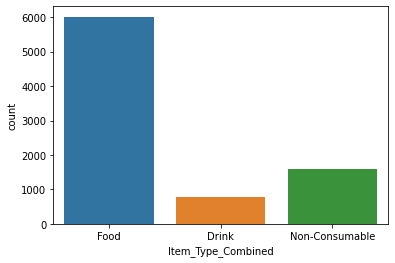

In [111]:
sns.countplot(x='Item_Type_Combined',data=df_train)

In [112]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Combined
0,FDA15,9.300,0,NaN,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380,22,Food
1,DRC01,5.920,2,NaN,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228,12,Drink
2,FDN15,17.500,0,NaN,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700,22,Food
3,FDX07,19.200,2,NaN,6,182.0950,0,1998,1,2,Grocery Store,732.3800,23,Food
4,NCD19,8.930,Non-Edible,NaN,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052,34,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,NaN,13,214.5218,1,1987,0,2,Supermarket Type1,2778.3834,34,Food
8519,FDS36,8.380,2,NaN,0,108.1570,7,2002,1,1,Supermarket Type1,549.2850,19,Food
8520,NCJ29,10.600,Non-Edible,NaN,8,85.1224,6,2004,2,1,Supermarket Type1,1193.1136,17,Non-Consumable
8521,FDN46,7.210,2,NaN,13,103.1332,3,2009,1,2,Supermarket Type2,1845.5976,12,Food


In [113]:
df3=df_train

In [114]:
df_train=df3

### Label Encoding:

In [67]:
var=['Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Size' ,'Outlet_Location_Type']

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
for i in var:
    df_train[i]=le.fit_transform(df_train[i])

In [71]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Combined
0,FDA15,9.300,0,1,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380,22,Food
1,DRC01,5.920,2,1,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228,12,Drink
2,FDN15,17.500,0,1,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700,22,Food
3,FDX07,19.200,2,3,6,182.0950,0,1998,1,2,Grocery Store,732.3800,23,Food
4,NCD19,8.930,1,3,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052,34,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,1,13,214.5218,1,1987,0,2,Supermarket Type1,2778.3834,34,Food
8519,FDS36,8.380,2,1,0,108.1570,7,2002,1,1,Supermarket Type1,549.2850,19,Food
8520,NCJ29,10.600,1,1,8,85.1224,6,2004,2,1,Supermarket Type1,1193.1136,17,Non-Consumable
8521,FDN46,7.210,2,2,13,103.1332,3,2009,1,2,Supermarket Type2,1845.5976,12,Food


### One Hot Encoding:

In [72]:
df_train=pd.get_dummies(df_train,columns=['Outlet_Type','Item_Type_Combined'])

In [73]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,1,4,249.8092,9,1999,1,0,3735.1380,22,0,1,0,0,0,1,0
1,DRC01,5.92,2,1,14,48.2692,3,2009,1,2,443.4228,12,0,0,1,0,1,0,0


***
### X, y:

In [74]:
X=df_train.drop(['Item_Identifier','Outlet_Establishment_Year', 'Item_Outlet_Sales'],axis=1)

In [75]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.300,0,1,4,249.8092,9,1,0,22,0,1,0,0,0,1,0
1,5.920,2,1,14,48.2692,3,1,2,12,0,0,1,0,1,0,0
2,17.500,0,1,10,141.6180,9,1,0,22,0,1,0,0,0,1,0
3,19.200,2,3,6,182.0950,0,1,2,23,1,0,0,0,0,1,0
4,8.930,1,3,9,53.8614,1,0,2,34,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,1,13,214.5218,1,0,2,34,0,1,0,0,0,1,0
8519,8.380,2,1,0,108.1570,7,1,1,19,0,1,0,0,0,1,0
8520,10.600,1,1,8,85.1224,6,2,1,17,0,1,0,0,0,0,1
8521,7.210,2,2,13,103.1332,3,1,2,12,0,0,1,0,0,1,0


In [76]:
y=df_train['Item_Outlet_Sales']

In [77]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [78]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [79]:
lr.score(X_test,y_test)

0.5645827886623322

In [80]:
y_pred=lr.predict(X_test)

In [81]:
from  sklearn.metrics import mean_squared_error

In [82]:
from math import sqrt

In [83]:
sqrt(mean_squared_error(y_test,y_pred))

1097.1063968076708

<AxesSubplot:>

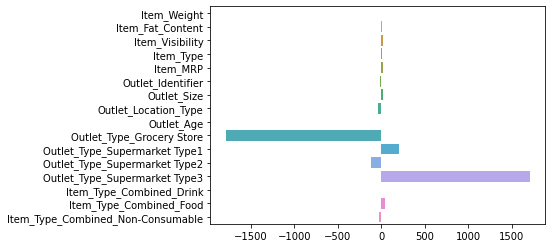

In [88]:
sns.barplot(lr.coef_, X.columns)